In [ ]:
# Step 1: Clean uninstall of conflicting builds
!pip uninstall -y tensorflow tensorflow-cpu tensorflow-gpu jax jaxlib numpy ml-dtypes tf2onnx onnx kagglehub tensorflow-model-optimization

!pip install \
    numpy==1.26.4 \
    tensorflow==2.19.0 \
    tensorflow-model-optimization==0.8.0 \
    tf2onnx==1.16.1 \
    onnx==1.16.2 \
    kagglehub==0.2.3 \
    jax==0.4.33 \
    ml_dtypes>=0.5.0

# ---- Step 3: Restart runtime/session manually ----
# (In Colab: Menu → Runtime → Restart session)

# Step 4: After restart, run this test block:
import tensorflow as tf
import numpy as np
import kagglehub, os, glob
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print("✅ Environment ready")
print("TF:", tf.__version__, " NumPy:", np.__version__)


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: jax 0.4.33
Uninstalling jax-0.4.33:
  Successfully uninstalled jax-0.4.33
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: ml-dtypes 0.4.0
Uninstalling ml-dtypes-0.4.0:
  Successfully uninstalled ml-dtypes-0.4.0
Found existing installation: tf2onnx 1.16.1
Uninstalling tf2onnx-1.16.1:
  Successfully uninstalled tf2onnx-1.16.1
Found existing installation: onnx 1.16.2
Uninstalling onnx-1.16.2:
  Successfully uninstalled onnx-1.16.2
Found existing installation: kagglehub 0.2.3
Uninstalling kagglehub-0.2.3:
  Successfully uninstalled kagglehub-0.2.3
Found existing installation: tensorflow-model-optimization 0.8.0
Uninstalling tensorflow-model-optimization-0.8.0:
  Successfully uninstalled tensorflow-model-optimization-0.8.0
ERROR: pip's dependency resol

In [ ]:
# Step 4: After restart, run this test block:
import tensorflow as tf
import numpy as np
import kagglehub, os, glob
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print("✅ Environment ready")
print("TF:", tf.__version__, " NumPy:", np.__version__)

✅ Environment ready
TF: 2.19.0  NumPy: 1.26.4


In [ ]:
!pip install -U kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.2.3
    Uninstalling kagglehub-0.2.3:
      Successfully uninstalled kagglehub-0.2.3


In [ ]:
import kagglehub
print("KaggleHub version:", kagglehub.__version__)


KaggleHub version: 0.3.13


In [ ]:
dir(kagglehub)


['KaggleDatasetAdapter',
 'PolarsFrameType',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'auth',
 'cache',
 'clients',
 'colab_cache_resolver',
 'competition',
 'competition_download',
 'config',
 'dataset_download',
 'dataset_load',
 'dataset_upload',
 'datasets',
 'datasets_enums',
 'datasets_helpers',
 'env',
 'exceptions',
 'gcs_upload',
 'get_package_asset_path',
 'handle',
 'http_resolver',
 'integrity',
 'kaggle_cache_resolver',
 'kagglehub',
 'load_dataset',
 'logger',
 'login',
 'model_download',
 'model_upload',
 'models',
 'models_helpers',
 'notebook_output_download',
 'notebooks',
 'package_import',
 'packages',
 'registry',
 'resolver',
 'signing',
 'tracker',
 'utility_script_install',
 'utility_scripts',
 'whoami']

In [ ]:
import kagglehub
print("KaggleHub version:", kagglehub.__version__)

path = kagglehub.dataset_download("hichamachahboun/mnist-handwritten-digits")
print("✅ Dataset downloaded to:", path)


KaggleHub version: 0.3.13


100%|██████████| 11.0M/11.0M [00:00<00:00, 182MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/hichamachahboun/mnist-handwritten-digits/versions/2


In [ ]:
os.listdir(path)

['readme.md',
 'train_images.npy',
 'train_labels.npy',
 'test_images.npy',
 'test_labels.npy']

In [ ]:
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
def find_first(pattern):
    matches = glob.glob(os.path.join(path, pattern))
    return matches[0] if matches else None

X_train_path = find_first("*train_images*.npy")
y_train_path = find_first("*train_labels*.npy")
X_test_path  = find_first("*test_images*.npy")
y_test_path  = find_first("*test_labels*.npy")


print("Train:", X_train_path, y_train_path)
print("Test :", X_test_path, y_test_path)

assert X_train_path and y_train_path, "train files not found in dataset."

def prep_X(X):
    X = X.astype(np.float32)
    if X.ndim == 2: X = X.reshape(-1,28,28,1)
    elif X.ndim == 3: X = X[...,None]
    if X.max()>1.5: X/=255.
    return X

def prep_y(y): return y.astype(np.int64).ravel()

X_train = prep_X(np.load(X_train_path))
y_train = prep_y(np.load(y_train_path))
X_test  = prep_X(np.load(X_test_path))
y_test  = prep_y(np.load(y_test_path))

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)
IMG_H, IMG_W, IN_CH = X_train.shape[1:]
NUM_CLASSES = int(np.max(y_train))+1
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: /root/.cache/kagglehub/datasets/hichamachahboun/mnist-handwritten-digits/versions/2/train_images.npy /root/.cache/kagglehub/datasets/hichamachahboun/mnist-handwritten-digits/versions/2/train_labels.npy
Test : /root/.cache/kagglehub/datasets/hichamachahboun/mnist-handwritten-digits/versions/2/test_images.npy /root/.cache/kagglehub/datasets/hichamachahboun/mnist-handwritten-digits/versions/2/test_labels.npy
Train: (54000, 28, 28, 1) Val: (6000, 28, 28, 1) Test: (10000, 28, 28, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, Model



def dws_block(x, out_ch, stride=1, se_ratio=0.25):
    x = layers.DepthwiseConv2D(3, strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x); x = layers.ReLU()(x)
    x = layers.Conv2D(out_ch,1,padding="same",use_bias=False)(x)
    x = layers.BatchNormalization()(x); x = layers.ReLU()(x)
    if se_ratio>0:
        se = layers.GlobalAveragePooling2D()(x)
        se = layers.Reshape((1,1,out_ch))(se)
        se = layers.Conv2D(int(out_ch*se_ratio),1,activation="relu")(se)
        se = layers.Conv2D(out_ch,1,activation="sigmoid")(se)
        x = layers.Multiply()([x,se])
    return x

def make_ds_cnn(input_shape=(28,28,1), num_classes=10, width=1.0):
    ch=lambda c:max(8,int(c*width))
    inp=layers.Input(shape=input_shape)
    x=layers.Conv2D(ch(16),3,padding="same",use_bias=False)(inp)
    x=layers.BatchNormalization()(x); x=layers.ReLU()(x)
    x=dws_block(x,ch(32),1)
    x=dws_block(x,ch(64),2)
    x=dws_block(x,ch(64),1)
    x=dws_block(x,ch(96),2)
    x=dws_block(x,ch(96),1)
    x=layers.GlobalAveragePooling2D()(x)
    x=layers.Dropout(0.1)(x)
    out=layers.Dense(num_classes,activation="softmax",dtype="float32")(x)
    return Model(inp,out,name="ds_cnn_tiny")

model = make_ds_cnn((IMG_H,IMG_W,IN_CH), NUM_CLASSES, width=1.0)
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])
model.summary()


Model: "ds_cnn_tiny"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 28, 28,    │        144 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_5  │ (None, 28, 28,    │        144 │ re_lu_11[0][0]    │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 28, 28,    │        512 │ re_lu_12[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ re_lu_13[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 1, 1, 8)   │        264 │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 1, 1, 32)  │        288 │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_5          │ (None, 28, 28,    │          0 │ re_lu_13[0][0],   │
│ (Multiply)          │ 32)               │            │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_6  │ (None, 14, 14,    │        288 │ multiply_5[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 14, 14,    │          0 │ batch_normalizat

 Total params: 42,402 (165.63 KB)

 Trainable params: 41,122 (160.63 KB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/20
211/211 - 189s - 896ms/step - accuracy: 0.7830 - loss: 0.7393 - val_accuracy: 0.0973 - val_loss: 3.1271 - learning_rate: 0.0010
Epoch 2/20
211/211 - 199s - 943ms/step - accuracy: 0.9744 - loss: 0.0920 - val_accuracy: 0.1123 - val_loss: 4.9855 - learning_rate: 0.0010
Epoch 3/20
211/211 - 164s - 778ms/step - accuracy: 0.9837 - loss: 0.0570 - val_accuracy: 0.6557 - val_loss: 0.9526 - learning_rate: 0.0010
Epoch 4/20
211/211 - 163s - 771ms/step - accuracy: 0.9870 - loss: 0.0436 - val_accuracy: 0.9442 - val_loss: 0.1860 - learning_rate: 0.0010
Epoch 5/20
211/211 - 203s - 960ms/step - accuracy: 0.9899 - loss: 0.0337 - val_accuracy: 0.9707 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 6/20
211/211 - 203s - 961ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9240 - val_loss: 0.2420 - learning_rate: 0.0010
Epoch 7/20
211/211 - 201s - 952ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9830 - val_loss: 0.0593 - learning_rate: 0.0010
Epoch 8/20
211/211 - 164s -

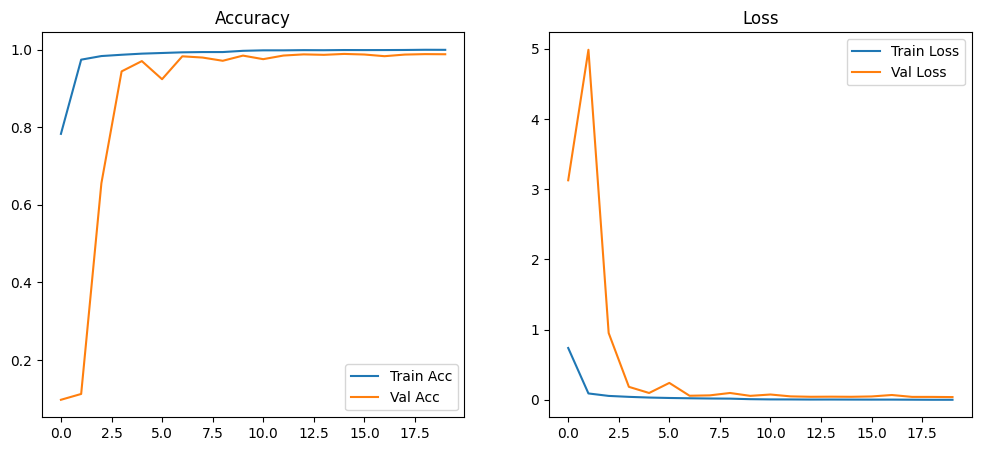

In [ ]:
# ✅ Define callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        verbose=1
    )
]

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=256,
    verbose=2,
    callbacks=callbacks
)

# ✅ Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%  |  Loss: {val_loss:.4f}")

# ✅ Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"🧠 Test Accuracy: {test_acc*100:.2f}%  |  Loss: {test_loss:.4f}")

# ✅ Plot accuracy and loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.show()


<Figure size 800x800 with 0 Axes>

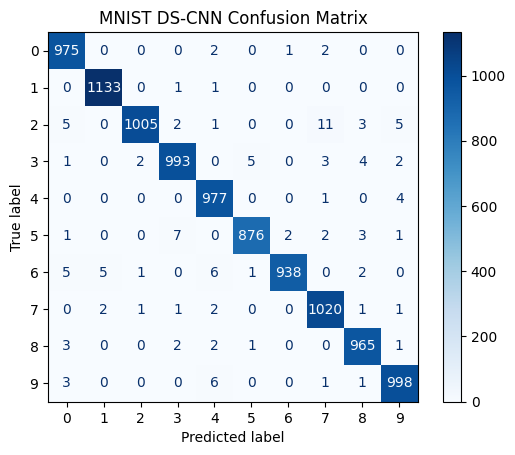

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Get model predictions
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot it
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(NUM_CLASSES))
disp.plot(cmap="Blues", values_format='d')
plt.title("MNIST DS-CNN Confusion Matrix")
plt.show()


In [ ]:
import tensorflow as tf
import os

# ✅ Create export directory
os.makedirs("export", exist_ok=True)

# ✅ File paths
fp32_path   = "export/mnist_edge_ds_cnn_fp32.keras"
tflite_path = "export/mnist_edge_ds_cnn_int8.tflite"

# ✅ Save full precision model
model.save(fp32_path)
print(f"✅ Saved FP32 model to: {fp32_path}")

# ✅ Representative dataset generator for INT8 quantization
def rep_ds():
    for i in range(min(500, len(X_train))):
        yield [X_train[i:i+1]]

# ✅ Convert model to fully quantized INT8 TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = rep_ds
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# ✅ Perform conversion
tflite_int8 = converter.convert()

# ✅ Save quantized model
with open(tflite_path, "wb") as f:
    f.write(tflite_int8)

print(f"🎯 Quantized INT8 model saved to: {tflite_path}")


✅ Saved FP32 model to: export/mnist_edge_ds_cnn_fp32.keras
Saved artifact at '/tmp/tmpdf614v2j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_62')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137616325028048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325031888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325031696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325031120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325032272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325029776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325032080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325030928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325031312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137616325033232: Tensor

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


🎯 Quantized INT8 model saved to: export/mnist_edge_ds_cnn_int8.tflite


In [ ]:
from google.colab import files

# ✅ Download both files
files.download("export/mnist_edge_ds_cnn_fp32.keras")
files.download("export/mnist_edge_ds_cnn_int8.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
interpreter=tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()
inp=interpreter.get_input_details()[0]
out=interpreter.get_output_details()[0]
scale,zero=inp["quantization"]

def tflite_eval(X,y):
    Xq=(X/scale+zero).round().astype(np.int8)
    preds=[]
    for i in range(len(Xq)):
        interpreter.set_tensor(inp["index"],Xq[i:i+1])
        interpreter.invoke()
        preds.append(interpreter.get_tensor(out["index"])[0])
    preds=np.array(preds).argmax(axis=1)
    return (preds==y).mean()

val_acc=tflite_eval(X_val,y_val)
test_acc=tflite_eval(X_test,y_test)
print(f"TFLite INT8 Validation Acc = {val_acc:.4f}")
print(f"TFLite INT8 Test Acc = {test_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


TFLite INT8 Validation Acc = 0.9878
TFLite INT8 Test Acc = 0.9865


In [ ]:
import tf2onnx
spec=(tf.TensorSpec((None,IMG_H,IMG_W,IN_CH),tf.float32,name="input"),)
onnx_model,_=tf2onnx.convert.from_keras(model,input_signature=spec,opset=13)
onnx_path="export/mnist_edge_ds_cnn_fp32.onnx"
with open(onnx_path,"wb") as f: f.write(onnx_model.SerializeToString())
print("Saved:", onnx_path)


Saved: export/mnist_edge_ds_cnn_fp32.onnx


In [ ]:
from google.colab import files
files.download(tflite_path)
files.download(fp32_path)
files.download(onnx_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Screenshot 2025-11-07 222839.png to Screenshot 2025-11-07 222839.png


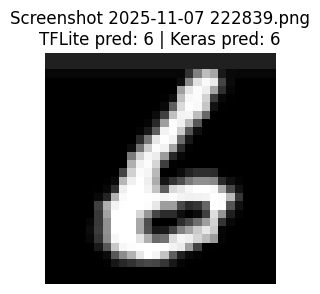

[Screenshot 2025-11-07 222839.png] → TFLite prediction: 6,  Keras prediction: 6


In [ ]:
# === Upload & test local handwritten digit images (PNG/JPG) ===
from google.colab import files
import numpy as np, cv2, os
import matplotlib.pyplot as plt
import tensorflow as tf

# ---- Config: paths to your saved models (adjust if different) ----
FP32_PATH   = "export/mnist_edge_ds_cnn_fp32.keras"           # optional
TFLITE_PATH = "export/mnist_edge_ds_cnn_int8.tflite"          # required for TFLite test

# Try to load FP32 model if 'model' not already in memory
if "model" not in globals():
    if os.path.exists(FP32_PATH):
        model = tf.keras.models.load_model(FP32_PATH)
        print("Loaded FP32 Keras model from:", FP32_PATH)
    else:
        model = None
        print("No FP32 Keras model found—skipping Keras prediction.")

# Load TFLite interpreter
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
scale, zero = inp["quantization"]

def preprocess_img_bgr(frame_bgr, target_hw=(28,28)):
    """Grayscale -> center-crop square -> resize -> normalize [0,1] -> auto-invert if needed.
       Returns float32 (1,28,28,1) and the 28x28 uint8 image for display."""
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    s = min(h, w)
    y0 = (h - s) // 2
    x0 = (w - s) // 2
    crop = gray[y0:y0+s, x0:x0+s]
    small = cv2.resize(crop, target_hw, interpolation=cv2.INTER_AREA)

    # Normalize to [0,1]
    img = small.astype(np.float32) / 255.0

    # MNIST digits are "bright on dark". If your photo is dark digit on white paper,
    # the mean will be high; auto-invert to match MNIST.
    if img.mean() > 0.5:
        img = 1.0 - img  # invert

    img = img[None, ..., None]   # (1,28,28,1)
    return img, small

def predict_tflite(X_float):
    Xq = (X_float/scale + zero).round().astype(np.int8)
    interpreter.set_tensor(inp["index"], Xq)
    interpreter.invoke()
    out_q = interpreter.get_tensor(out["index"])[0]
    return int(np.argmax(out_q)), out_q

uploaded = files.upload()  # choose one or more images
for fname in uploaded.keys():
    bgr = cv2.imread(fname)
    if bgr is None:
        print(f"Could not read {fname}. Skipping.")
        continue

    X_one, vis28 = preprocess_img_bgr(bgr)

    # FP32 Keras prediction (optional)
    if model is not None:
        p_keras = int(np.argmax(model.predict(X_one, verbose=0)[0]))
    else:
        p_keras = None

    # INT8 TFLite prediction
    p_tflite, logits_q = predict_tflite(X_one)

    # Show
    plt.figure(figsize=(3,3))
    plt.imshow(vis28, cmap='gray')
    plt.axis('off')
    ttl = f"{fname}\nTFLite pred: {p_tflite}"
    if p_keras is not None:
        ttl += f" | Keras pred: {p_keras}"
    plt.title(ttl)
    plt.show()

    print(f"[{fname}] → TFLite prediction: {p_tflite}", end="")
    if p_keras is not None:
        print(f",  Keras prediction: {p_keras}")
    else:
        print()


Saving Screenshot 2025-11-07 222501.png to Screenshot 2025-11-07 222501 (3).png


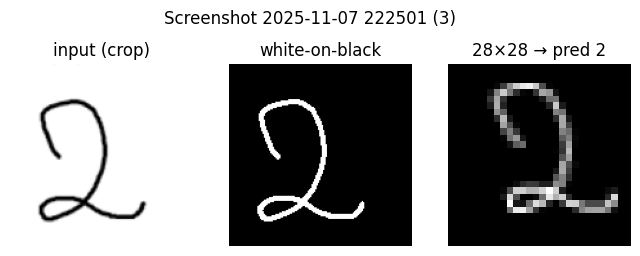

[Screenshot 2025-11-07 222501 (3).png] TFLite prediction: 2
Top-3: 2:0.231, 8:0.086, 9:0.085
Saved: converted/Screenshot 2025-11-07 222501 (3)_wob_full.png and converted/Screenshot 2025-11-07 222501 (3)_mnist28.png 



In [ ]:
# === Upload -> Convert to MNIST style (white-on-black, 28x28) -> Predict with INT8 TFLite ===
from google.colab import files
import numpy as np, cv2, os, math
import matplotlib.pyplot as plt
import tensorflow as tf

TFLITE_PATH = "export/mnist_edge_ds_cnn_int8.tflite"   # <-- change if needed

# ---------- Helpers: conversion ----------
def deskew_28x28(img28):
    bw = (img28 * 255).astype(np.uint8)
    m = cv2.moments(bw)
    if abs(m["mu02"]) < 1e-3:  # avoid div-by-zero
        return img28
    skew = m["mu11"] / m["mu02"]
    M = np.array([[1, skew, -0.5*28*skew],[0, 1, 0]], dtype=np.float32)
    return cv2.warpAffine(img28, M, (28,28), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0.0)

def to_white_on_black(gray):
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, th  = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    inv    = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    if np.count_nonzero(wob) in (0, wob.size):  # degenerate
        wob = cv2.normalize(255-gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        _, wob = cv2.threshold(wob, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return wob

def crop_resize_center_to_28(wob):
    ys, xs = np.where(wob > 0)
    if len(xs) == 0 or len(ys) == 0:
        return np.zeros((28,28), np.float32)
    x0, x1 = xs.min(), xs.max()
    y0, y1 = ys.min(), ys.max()
    crop = wob[y0:y1+1, x0:x1+1]

    h, w = crop.shape
    if h >= w:
        new_h, new_w = 20, max(1, int(round(20*w/h)))
    else:
        new_w, new_h = 20, max(1, int(round(20*h/w)))
    resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)

    canvas = np.zeros((28,28), np.uint8)
    y_off = (28 - new_h)//2
    x_off = (28 - new_w)//2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized

    m = cv2.moments(canvas)
    if m["m00"] != 0:
        cx, cy = m["m10"]/m["m00"], m["m01"]/m["m00"]
        sx, sy = int(round(14 - cx)), int(round(14 - cy))
        M = np.float32([[1,0,sx],[0,1,sy]])
        canvas = cv2.warpAffine(canvas, M, (28,28), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    img = canvas.astype(np.float32)/255.0
    img = deskew_28x28(img)
    return img

# ---------- Load TFLite ----------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    # img28_float: (28,28) float32 in [0,1], WHITE digit on BLACK
    x = img28_float[None, ..., None]
    xq = (x/in_scale + in_zero).round().astype(np.int8)
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    # dequantize to logits/probs for nicer reporting
    y = (yq.astype(np.float32) - out_zero) * out_scale
    # if these are logits, softmax them; if already probs, this is fine too
    probs = np.exp(y - y.max()); probs /= probs.sum()
    pred = int(np.argmax(probs))
    # top-3
    top3_idx = probs.argsort()[-3:][::-1]
    top3 = [(int(i), float(probs[i])) for i in top3_idx]
    return pred, top3, probs

# ---------- Upload, convert, predict ----------
uploaded = files.upload()  # choose one or more images
os.makedirs("converted", exist_ok=True)

for fname in uploaded.keys():
    bgr = cv2.imread(fname)
    if bgr is None:
        print(f"Could not read {fname}")
        continue

    # center-crop to square
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    s = min(h, w); y0 = (h - s)//2; x0 = (w - s)//2
    gray_sq = gray[y0:y0+s, x0:x0+s]

    wob_full = to_white_on_black(gray_sq)
    mnist28  = crop_resize_center_to_28(wob_full)
    wob28    = (mnist28 * 255).astype(np.uint8)

    # Predict
    pred, top3, probs = tflite_predict(mnist28)

    # Save outputs
    base = os.path.splitext(os.path.basename(fname))[0]
    full_out = f"converted/{base}_wob_full.png"
    m28_out  = f"converted/{base}_mnist28.png"
    cv2.imwrite(full_out, wob_full)
    cv2.imwrite(m28_out, wob28)

    # Show what the model actually saw
    plt.figure(figsize=(8,3))
    plt.subplot(1,3,1); plt.imshow(gray_sq, cmap='gray'); plt.axis('off'); plt.title("input (crop)")
    plt.subplot(1,3,2); plt.imshow(wob_full, cmap='gray'); plt.axis('off'); plt.title("white-on-black")
    plt.subplot(1,3,3); plt.imshow(wob28, cmap='gray'); plt.axis('off'); plt.title(f"28×28 → pred {pred}")
    plt.suptitle(base)
    plt.show()

    print(f"[{fname}] TFLite prediction: {pred}")
    print("Top-3:", ", ".join([f"{i}:{p:.3f}" for i,p in top3]))
    print("Saved:", full_out, "and", m28_out, "\n")


In [ ]:
from google.colab import files
files.download(tflite_path)
files.download(fp32_path)
files.download(onnx_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Screenshot 2025-11-07 222501.png to Screenshot 2025-11-07 222501.png


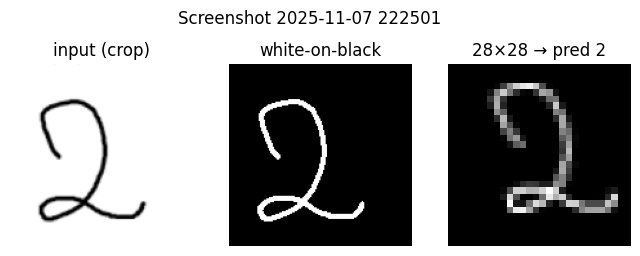

[Screenshot 2025-11-07 222501.png] TFLite prediction: 2
Top-3: 2:0.231, 8:0.086, 9:0.085
Saved: converted/Screenshot 2025-11-07 222501_wob_full.png and converted/Screenshot 2025-11-07 222501_mnist28.png 



In [ ]:
# === Upload -> Convert to MNIST style (white-on-black, 28x28) -> Predict with INT8 TFLite ===
from google.colab import files
import numpy as np, cv2, os, math
import matplotlib.pyplot as plt
import tensorflow as tf

TFLITE_PATH = "/content/mnist_edge_ds_cnn_int8 .tflite"   # <-- change if needed

# ---------- Helpers: conversion ----------
def deskew_28x28(img28):
    bw = (img28 * 255).astype(np.uint8)
    m = cv2.moments(bw)
    if abs(m["mu02"]) < 1e-3:  # avoid div-by-zero
        return img28
    skew = m["mu11"] / m["mu02"]
    M = np.array([[1, skew, -0.5*28*skew],[0, 1, 0]], dtype=np.float32)
    return cv2.warpAffine(img28, M, (28,28), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0.0)

def to_white_on_black(gray):
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, th  = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    inv    = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    if np.count_nonzero(wob) in (0, wob.size):  # degenerate
        wob = cv2.normalize(255-gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        _, wob = cv2.threshold(wob, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return wob

def crop_resize_center_to_28(wob):
    ys, xs = np.where(wob > 0)
    if len(xs) == 0 or len(ys) == 0:
        return np.zeros((28,28), np.float32)
    x0, x1 = xs.min(), xs.max()
    y0, y1 = ys.min(), ys.max()
    crop = wob[y0:y1+1, x0:x1+1]

    h, w = crop.shape
    if h >= w:
        new_h, new_w = 20, max(1, int(round(20*w/h)))
    else:
        new_w, new_h = 20, max(1, int(round(20*h/w)))
    resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)

    canvas = np.zeros((28,28), np.uint8)
    y_off = (28 - new_h)//2
    x_off = (28 - new_w)//2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized

    m = cv2.moments(canvas)
    if m["m00"] != 0:
        cx, cy = m["m10"]/m["m00"], m["m01"]/m["m00"]
        sx, sy = int(round(14 - cx)), int(round(14 - cy))
        M = np.float32([[1,0,sx],[0,1,sy]])
        canvas = cv2.warpAffine(canvas, M, (28,28), flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    img = canvas.astype(np.float32)/255.0
    img = deskew_28x28(img)
    return img

# ---------- Load TFLite ----------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    # img28_float: (28,28) float32 in [0,1], WHITE digit on BLACK
    x = img28_float[None, ..., None]
    xq = (x/in_scale + in_zero).round().astype(np.int8)
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    # dequantize to logits/probs for nicer reporting
    y = (yq.astype(np.float32) - out_zero) * out_scale
    # if these are logits, softmax them; if already probs, this is fine too
    probs = np.exp(y - y.max()); probs /= probs.sum()
    pred = int(np.argmax(probs))
    # top-3
    top3_idx = probs.argsort()[-3:][::-1]
    top3 = [(int(i), float(probs[i])) for i in top3_idx]
    return pred, top3, probs

# ---------- Upload, convert, predict ----------
uploaded = files.upload()  # choose one or more images
os.makedirs("converted", exist_ok=True)

for fname in uploaded.keys():
    bgr = cv2.imread(fname)
    if bgr is None:
        print(f"Could not read {fname}")
        continue

    # center-crop to square
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    s = min(h, w); y0 = (h - s)//2; x0 = (w - s)//2
    gray_sq = gray[y0:y0+s, x0:x0+s]

    wob_full = to_white_on_black(gray_sq)
    mnist28  = crop_resize_center_to_28(wob_full)
    wob28    = (mnist28 * 255).astype(np.uint8)

    # Predict
    pred, top3, probs = tflite_predict(mnist28)

    # Save outputs
    base = os.path.splitext(os.path.basename(fname))[0]
    full_out = f"converted/{base}_wob_full.png"
    m28_out  = f"converted/{base}_mnist28.png"
    cv2.imwrite(full_out, wob_full)
    cv2.imwrite(m28_out, wob28)

    # Show what the model actually saw
    plt.figure(figsize=(8,3))
    plt.subplot(1,3,1); plt.imshow(gray_sq, cmap='gray'); plt.axis('off'); plt.title("input (crop)")
    plt.subplot(1,3,2); plt.imshow(wob_full, cmap='gray'); plt.axis('off'); plt.title("white-on-black")
    plt.subplot(1,3,3); plt.imshow(wob28, cmap='gray'); plt.axis('off'); plt.title(f"28×28 → pred {pred}")
    plt.suptitle(base)
    plt.show()

    print(f"[{fname}] TFLite prediction: {pred}")
    print("Top-3:", ", ".join([f"{i}:{p:.3f}" for i,p in top3]))
    print("Saved:", full_out, "and", m28_out, "\n")


In [ ]:
# Minimal: show original image + print predicted number (no colors, no 28x28 panel)
from google.colab import files
import numpy as np, cv2, matplotlib.pyplot as plt
import tensorflow as tf

TFLITE_PATH = "/content/mnist_edge_ds_cnn_int8 .tflite"  # change if needed

# --- Load INT8 TFLite ---
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    x = img28_float[None, ..., None]                     # (1,28,28,1)
    xq = (x/in_scale + in_zero).round().astype(np.int8)  # quantize
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    y  = (yq.astype(np.float32) - out_zero) * out_scale  # dequantize logits
    return int(np.argmax(y))

# --- MNIST-style preprocessing (white digit on black) ---
def to_white_on_black(gray):
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, th  = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    inv    = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    if np.count_nonzero(wob) in (0, wob.size):
        wob = cv2.normalize(255-gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        _, wob = cv2.threshold(wob, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return wob

def crop_resize_center_28(wob):
    ys, xs = np.where(wob > 0)
    if len(xs) == 0 or len(ys) == 0:
        return np.zeros((28,28), np.float32)
    x0, x1, y0, y1 = xs.min(), xs.max(), ys.min(), ys.max()
    crop = wob[y0:y1+1, x0:x1+1]
    h, w = crop.shape
    if h >= w:
        new_h, new_w = 20, max(1, int(round(20*w/h)))
    else:
        new_w, new_h = 20, max(1, int(round(20*h/w)))
    resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((28,28), np.uint8)
    y_off, x_off = (28-new_h)//2, (28-new_w)//2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized
    return canvas.astype(np.float32)/255.0

# --- Upload, preprocess, predict, show original only ---
uploaded = files.upload()
for fname in uploaded.keys():
    bgr  = cv2.imread(fname)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    wob  = to_white_on_black(gray)
    mnist28 = crop_resize_center_28(wob)
    pred = tflite_predict(mnist28)

    # Show only the original image, no overlay color
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,4))
    plt.imshow(rgb); plt.axis('off')
    plt.show()

    print(f"Predicted digit: {pred}")

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

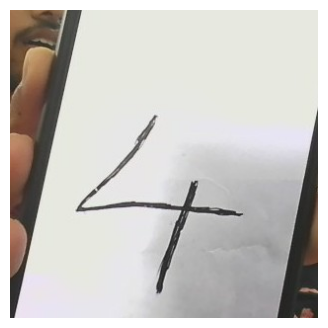

Predicted digit: 4


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np, cv2, matplotlib.pyplot as plt

def take_photo_with_box(quality=0.9, box_rel=0.6,
                        full_path='/content/webcam_full.jpg',
                        roi_path='/content/webcam_roi.jpg'):
    """
    Opens webcam with a centered guide box.
    box_rel = side length of the square box as a fraction of min(videoWidth, videoHeight).
    Returns (full_path, roi_path).
    """
    js = Javascript(f"""
    async function takePhotoWithBox(quality) {{
      const div = document.createElement('div');
      const video = document.createElement('video');
      const btn   = document.createElement('button');
      const wrap  = document.createElement('div');
      const overlay = document.createElement('div');

      btn.textContent = 'Capture';
      btn.style.fontSize = '16px';
      btn.style.marginTop = '8px';

      wrap.style.position = 'relative';
      wrap.style.display  = 'inline-block';

      video.style.display = 'block';
      video.style.maxWidth = '640px';

      // Overlay guide box
      overlay.style.position = 'absolute';
      overlay.style.border = '3px solid #00FF00';
      overlay.style.boxSizing = 'border-box';
      overlay.style.pointerEvents = 'none';

      wrap.appendChild(video);
      wrap.appendChild(overlay);
      div.appendChild(wrap);
      div.appendChild(btn);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      video.srcObject = stream;
      await video.play();

      function positionOverlay() {{
        const vw = video.videoWidth;
        const vh = video.videoHeight;
        if (!vw || !vh) return;
        // Size of square box
        const s = Math.floor(Math.min(vw, vh) * {float(box_rel)});
        const left = Math.floor((vw - s)/2);
        const top  = Math.floor((vh - s)/2);

        // Map video pixels -> CSS pixels for current rendered size
        const rect = video.getBoundingClientRect();
        const scaleX = rect.width / vw;
        const scaleY = rect.height / vh;

        overlay.style.left   = (left * scaleX) + 'px';
        overlay.style.top    = (top  * scaleY) + 'px';
        overlay.style.width  = (s    * scaleX) + 'px';
        overlay.style.height = (s    * scaleY) + 'px';
      }}

      // Adjust overlay as video lays out
      const ro = new ResizeObserver(positionOverlay);
      ro.observe(video);

      await new Promise(resolve => btn.onclick = resolve);

      // Read current frame to canvas
      const vw = video.videoWidth;
      const vh = video.videoHeight;
      const canvas = document.createElement('canvas');
      canvas.width = vw;
      canvas.height = vh;
      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      // Compute ROI in video pixel coords
      const s = Math.floor(Math.min(vw, vh) * {float(box_rel)});
      const left = Math.floor((vw - s)/2);
      const top  = Math.floor((vh - s)/2);

      // Crop to ROI
      const crop = document.createElement('canvas');
      crop.width = s; crop.height = s;
      const cctx = crop.getContext('2d');
      cctx.drawImage(canvas, left, top, s, s, 0, 0, s, s);

      // Stop camera and clean up UI
      stream.getVideoTracks()[0].stop();
      div.remove();

      // Return both images as data URLs
      return {{
        full: canvas.toDataURL('image/jpeg', quality),
        roi:  crop.toDataURL('image/jpeg', quality)
      }};
    }}
    """)
    display(js)
    data = eval_js("takePhotoWithBox({})".format(quality))

    # save full frame
    full_b = b64decode(data['full'].split(',')[1])
    with open(full_path, 'wb') as f:
        f.write(full_b)
    # save cropped ROI
    roi_b = b64decode(data['roi'].split(',')[1])
    with open(roi_path, 'wb') as f:
        f.write(roi_b)

    return full_path, roi_path

# ----- Capture with placement box -----
full_path, roi_path = take_photo_with_box(quality=0.9, box_rel=0.65)  # tweak box_rel if you want a bigger/smaller box

# Use the ROI for prediction
bgr  = cv2.imread(roi_path)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
wob  = to_white_on_black(gray)
mnist28 = crop_resize_center_28(wob)
pred = tflite_predict(mnist28)

# Show only the original ROI (what you placed inside the box)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4)); plt.imshow(rgb); plt.axis('off'); plt.show()
print(f"Predicted digit: {pred}")


<IPython.core.display.Javascript object>

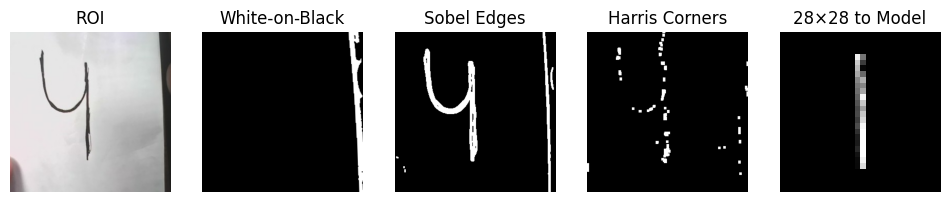

Predicted digit: 1


In [ ]:
# === Webcam MNIST Inference (with Harris corners + CV transforms) ===
# Colab-ready: shows a green placement box, captures ROI, preprocesses, predicts.

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

import numpy as np, cv2, matplotlib.pyplot as plt, tensorflow as tf
from scipy import ndimage

# ----------------------- Config -----------------------
TFLITE_PATH = "/content/mnist_edge_ds_cnn_int8 .tflite"  # <--- update if your filename differs
BOX_REL = 0.65      # size of the square guide box as a fraction of min(videoW, videoH)
QUALITY = 0.9       # JPEG quality for capture
DEBUG = True        # set False to hide debug panels and only show ROI + prediction

# ----------------- Webcam with placement box -----------------
def take_photo_with_box(quality=0.9, box_rel=0.65,
                        full_path='/content/webcam_full.jpg',
                        roi_path='/content/webcam_roi.jpg'):
    js = Javascript(f"""
    async function takePhotoWithBox(quality) {{
      const div = document.createElement('div');
      const video = document.createElement('video');
      const btn   = document.createElement('button');
      const wrap  = document.createElement('div');
      const overlay = document.createElement('div');

      btn.textContent = 'Capture';
      btn.style.fontSize = '16px';
      btn.style.marginTop = '8px';

      wrap.style.position = 'relative';
      wrap.style.display  = 'inline-block';

      video.style.display = 'block';
      video.style.maxWidth = '640px';

      overlay.style.position = 'absolute';
      overlay.style.border = '3px solid #00FF00';
      overlay.style.boxSizing = 'border-box';
      overlay.style.pointerEvents = 'none';

      wrap.appendChild(video);
      wrap.appendChild(overlay);
      div.appendChild(wrap);
      div.appendChild(btn);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      video.srcObject = stream;
      await video.play();

      function positionOverlay() {{
        const vw = video.videoWidth;
        const vh = video.videoHeight;
        if (!vw || !vh) return;

        const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
        const left = Math.floor((vw - s)/2);
        const top  = Math.floor((vh - s)/2);

        const rect = video.getBoundingClientRect();
        const scaleX = rect.width / vw;
        const scaleY = rect.height / vh;

        overlay.style.left   = (left * scaleX) + 'px';
        overlay.style.top    = (top  * scaleY) + 'px';
        overlay.style.width  = (s    * scaleX) + 'px';
        overlay.style.height = (s    * scaleY) + 'px';
      }}

      const ro = new ResizeObserver(positionOverlay);
      ro.observe(video);

      await new Promise(resolve => btn.onclick = resolve);

      const vw = video.videoWidth;
      const vh = video.videoHeight;

      const canvas = document.createElement('canvas');
      canvas.width = vw; canvas.height = vh;
      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
      const left = Math.floor((vw - s)/2);
      const top  = Math.floor((vh - s)/2);

      const crop = document.createElement('canvas');
      crop.width = s; crop.height = s;
      const cctx = crop.getContext('2d');
      cctx.drawImage(canvas, left, top, s, s, 0, 0, s, s);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return {{
        full: canvas.toDataURL('image/jpeg', quality),
        roi:  crop.toDataURL('image/jpeg', quality)
      }};
    }}
    """)
    display(js)
    data = eval_js("takePhotoWithBox({})".format(quality))

    full_b = b64decode(data['full'].split(',')[1])
    with open(full_path, 'wb') as f: f.write(full_b)

    roi_b = b64decode(data['roi'].split(',')[1])
    with open(roi_path, 'wb') as f: f.write(roi_b)

    return full_path, roi_path

# ----------------- CV helpers & preprocessing -----------------
def _largest_component(binary, min_area=50):
    num, labels, stats, _ = cv2.connectedComponentsWithStats((binary > 0).astype(np.uint8), connectivity=8)
    if num <= 1:
        return binary
    # ignore background (0), pick max area among others
    idx = 1 + int(np.argmax(stats[1:, cv2.CC_STAT_AREA]))
    if stats[idx, cv2.CC_STAT_AREA] < min_area:
        return binary
    return (labels == idx).astype(np.uint8) * 255

def _deskew(binary):
    pts = np.argwhere(binary > 0)
    if pts.size == 0:
        return binary
    m = cv2.moments((binary > 0).astype(np.uint8))
    if abs(m['mu02']) < 1e-2:
        return binary
    skew = m['mu11'] / m['mu02']
    h, w = binary.shape
    M = np.float32([[1, skew, -0.5 * skew * h],
                    [0,   1 , 0]])
    return cv2.warpAffine(binary, M, (w, h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0)

def _center_by_com(img):
    cy, cx = ndimage.center_of_mass((img > 0).astype(np.float32))
    if np.isnan(cy) or np.isnan(cx):
        return img
    shift_y = int(round(img.shape[0] / 2 - cy))
    shift_x = int(round(img.shape[1] / 2 - cx))
    return ndimage.shift(img.astype(np.float32), shift=(shift_y, shift_x),
                         order=1, mode='constant', cval=0.0).astype(np.uint8)

def _resize_to_mnist_canvas(binary):
    canvas = np.zeros((28, 28), np.uint8)
    ys, xs = np.where(binary > 0)
    if len(xs) == 0 or len(ys) == 0:
        return canvas.astype(np.float32) / 255.0
    x0, x1, y0, y1 = xs.min(), xs.max(), ys.min(), ys.max()
    crop = binary[y0:y1 + 1, x0:x1 + 1]
    h, w = crop.shape
    if h >= w:
        new_h, new_w = 20, max(1, int(round(20 * w / h)))
    else:
        new_w, new_h = 20, max(1, int(round(20 * h / w)))
    resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)
    y_off, x_off = (28 - new_h) // 2, (28 - new_w) // 2
    canvas[y_off:y_off + new_h, x_off:x_off + new_w] = resized
    return (canvas.astype(np.float32) / 255.0)

def preprocess_mnist_with_harris(gray,
                                 clahe_clip=2.0,
                                 blur_ksize=3,
                                 adapt_block=31,
                                 adapt_C=5,
                                 sobel_thresh=0.25,
                                 edge_alpha=0.30,
                                 corner_percentile=99.0,
                                 corner_beta=0.40):
    """
    Input: gray (uint8 ROI)
    Returns: mnist28(float32 28x28 [0,1]), debug dict
    """
    dbg = {}

    # 1) Normalize lighting
    clahe = cv2.createCLAHE(clipLimit=clahe_clip, tileGridSize=(8, 8))
    g = clahe.apply(gray)

    # 2) Blur + Adaptive threshold
    if blur_ksize and blur_ksize >= 3:
        g = cv2.GaussianBlur(g, (blur_ksize, blur_ksize), 0)
    th = cv2.adaptiveThreshold(g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, adapt_block, adapt_C)

    # 3) Auto invert to white digit on black
    inv = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    wob = cv2.medianBlur(wob, 3)
    wob = _largest_component(wob)

    # 4) Deskew
    wob = _deskew(wob)

    # 5) Sobel edges
    g32 = (g.astype(np.float32) / 255.0)
    sx = cv2.Sobel(g32, cv2.CV_32F, 1, 0, ksize=3)
    sy = cv2.Sobel(g32, cv2.CV_32F, 0, 1, ksize=3)
    mag = cv2.magnitude(sx, sy)
    if mag.max() > 0:
        mag /= mag.max()
    edges = (mag > sobel_thresh).astype(np.uint8) * 255
    edges = cv2.dilate(edges, np.ones((3,3), np.uint8), 1)

    # 6) Harris corners
    # Harris expects float; use small block/ksize for thin strokes
    harris = cv2.cornerHarris((g32 * 255).astype(np.float32), blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    thr = np.percentile(harris, corner_percentile)
    corners = (harris > thr).astype(np.uint8) * 255
    corners = cv2.dilate(corners, np.ones((3,3), np.uint8), 1)

    # 7) Fuse: wob OR weighted edges/corners
    fused = wob.copy()
    if edge_alpha > 0:
        fused = cv2.max(fused, (edges * edge_alpha).astype(np.uint8))
    if corner_beta > 0:
        fused = cv2.max(fused, (corners * corner_beta).astype(np.uint8))

    # Clean and center
    fused = cv2.medianBlur(fused, 3)
    fused = _largest_component(fused)
    fused = _center_by_com(fused)

    # 8) Put on MNIST canvas
    mnist28 = _resize_to_mnist_canvas(fused)

    # Debug views
    dbg['wob'] = wob
    dbg['edges'] = edges
    dbg['corners'] = corners
    dbg['fused'] = fused
    return mnist28, dbg

# ----------------- TFLite model (INT8) -----------------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    x = img28_float[None, ..., None]                     # (1,28,28,1)
    xq = (x / in_scale + in_zero).round().astype(np.int8)  # quantize
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    y  = (yq.astype(np.float32) - out_zero) * out_scale    # dequantize logits
    return int(np.argmax(y))

# ----------------- Capture → Preprocess → Predict -----------------
full_path, roi_path = take_photo_with_box(quality=QUALITY, box_rel=BOX_REL)

# Read ROI (BGR) → Gray
bgr  = cv2.imread(roi_path)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Advanced preprocessing (MNIST-style + Harris + Sobel)
mnist28, dbg = preprocess_mnist_with_harris(gray)

# Predict
pred = tflite_predict(mnist28)

# ----------------- Display -----------------
# Always show the ROI. If DEBUG=True, also show intermediate views and model input
if DEBUG:
    plt.figure(figsize=(12,3))
    plt.subplot(1,5,1); plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)); plt.title('ROI'); plt.axis('off')
    plt.subplot(1,5,2); plt.imshow(dbg['wob'], cmap='gray'); plt.title('White-on-Black'); plt.axis('off')
    plt.subplot(1,5,3); plt.imshow(dbg['edges'], cmap='gray'); plt.title('Sobel Edges'); plt.axis('off')
    plt.subplot(1,5,4); plt.imshow(dbg['corners'], cmap='gray'); plt.title('Harris Corners'); plt.axis('off')
    plt.subplot(1,5,5); plt.imshow(mnist28, cmap='gray'); plt.title('28×28 to Model'); plt.axis('off')
    plt.show()
else:
    # Minimal: show only the original ROI (no overlays)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,4)); plt.imshow(rgb); plt.axis('off'); plt.show()

print(f"Predicted digit: {pred}")


<IPython.core.display.Javascript object>

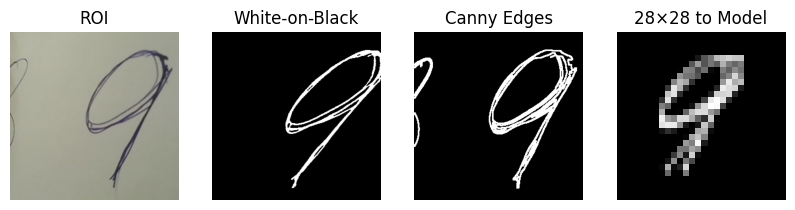

Predicted digit: 9


In [ ]:
# ==== Webcam MNIST Inference — CANNY-ONLY flow (Colab) ====
# - Webcam with centered green ROI box
# - CLAHE -> blur -> adaptive threshold -> auto invert (white digit on black)
# - Largest component -> deskew -> Canny edges (auto thresholds) -> light dilation
# - Fuse (digit mask OR edges) -> center of mass -> 28x28 canvas
# - INT8 TFLite inference

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

import numpy as np, cv2, matplotlib.pyplot as plt, tensorflow as tf
from scipy import ndimage

# ----------------------- Config -----------------------
TFLITE_PATH = "/mnist_edge_ds_cnn_int8 .tflite"  # <--- update if needed
BOX_REL = 0.65          # square guide box vs min(videoW, videoH)
QUALITY = 0.9
DEBUG = True            # False => only show ROI and print prediction

# Canny knobs
CANNY_SIGMA = 0.33      # 0.2–0.5; higher => stricter thresholds (fewer edges)
CANNY_APERTURE = 3      # 3 or 5
CANNY_L2 = True
EDGE_DILATE_ITERS = 1   # thicken edges a bit (try 2 if strokes too thin)
EDGE_ALPHA = 0.40       # edge influence when fusing with binarized digit (0..1)

# ----------------- Webcam with placement box -----------------
def take_photo_with_box(quality=0.9, box_rel=0.65,
                        full_path='/content/webcam_full.jpg',
                        roi_path='/content/webcam_roi.jpg'):
    js = Javascript(f"""
    async function takePhotoWithBox(quality) {{
      const div = document.createElement('div');
      const video = document.createElement('video');
      const btn   = document.createElement('button');
      const wrap  = document.createElement('div');
      const overlay = document.createElement('div');

      btn.textContent = 'Capture';
      btn.style.fontSize = '16px';
      btn.style.marginTop = '8px';

      wrap.style.position = 'relative';
      wrap.style.display  = 'inline-block';

      video.style.display = 'block';
      video.style.maxWidth = '640px';

      overlay.style.position = 'absolute';
      overlay.style.border = '3px solid #00FF00';
      overlay.style.boxSizing = 'border-box';
      overlay.style.pointerEvents = 'none';

      wrap.appendChild(video);
      wrap.appendChild(overlay);
      div.appendChild(wrap);
      div.appendChild(btn);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      video.srcObject = stream;
      await video.play();

      function positionOverlay() {{
        const vw = video.videoWidth, vh = video.videoHeight;
        if (!vw || !vh) return;
        const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
        const left = Math.floor((vw - s)/2);
        const top  = Math.floor((vh - s)/2);
        const rect = video.getBoundingClientRect();
        const scaleX = rect.width / vw, scaleY = rect.height / vh;
        overlay.style.left   = (left * scaleX) + 'px';
        overlay.style.top    = (top  * scaleY) + 'px';
        overlay.style.width  = (s    * scaleX) + 'px';
        overlay.style.height = (s    * scaleY) + 'px';
      }}

      const ro = new ResizeObserver(positionOverlay);
      ro.observe(video);
      await new Promise(resolve => btn.onclick = resolve);

      const vw = video.videoWidth, vh = video.videoHeight;
      const canvas = document.createElement('canvas');
      canvas.width = vw; canvas.height = vh;
      canvas.getContext('2d').drawImage(video, 0, 0);

      const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
      const left = Math.floor((vw - s)/2);
      const top  = Math.floor((vh - s)/2);

      const crop = document.createElement('canvas');
      crop.width = s; crop.height = s;
      crop.getContext('2d').drawImage(canvas, left, top, s, s, 0, 0, s, s);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return {{
        full: canvas.toDataURL('image/jpeg', quality),
        roi:  crop.toDataURL('image/jpeg', quality)
      }};
    }}
    """)
    display(js)
    data = eval_js("takePhotoWithBox({})".format(quality))

    with open(full_path, 'wb') as f:
        f.write(b64decode(data['full'].split(',')[1]))
    with open(roi_path, 'wb') as f:
        f.write(b64decode(data['roi'].split(',')[1]))
    return full_path, roi_path

# ----------------- CV helpers -----------------
def _largest_component(binary, min_area=50):
    num, labels, stats, _ = cv2.connectedComponentsWithStats((binary>0).astype(np.uint8), 8)
    if num <= 1: return binary
    idx = 1 + int(np.argmax(stats[1:, cv2.CC_STAT_AREA]))
    if stats[idx, cv2.CC_STAT_AREA] < min_area: return binary
    return (labels == idx).astype(np.uint8) * 255

def _deskew(binary):
    m = cv2.moments((binary>0).astype(np.uint8))
    if abs(m['mu02']) < 1e-2: return binary
    skew = m['mu11'] / m['mu02']
    h, w = binary.shape
    M = np.float32([[1, skew, -0.5*skew*h],[0,1,0]])
    return cv2.warpAffine(binary, M, (w,h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0)

def _center_by_com(img):
    cy, cx = ndimage.center_of_mass((img>0).astype(np.float32))
    if np.isnan(cy) or np.isnan(cx): return img
    dy, dx = int(round(img.shape[0]/2 - cy)), int(round(img.shape[1]/2 - cx))
    return ndimage.shift(img.astype(np.float32), (dy, dx), order=1,
                         mode='constant', cval=0.0).astype(np.uint8)

def _resize_to_mnist_canvas(binary):
    canvas = np.zeros((28,28), np.uint8)
    ys, xs = np.where(binary>0)
    if len(xs)==0: return canvas.astype(np.float32)/255.0
    x0,x1,y0,y1 = xs.min(),xs.max(),ys.min(),ys.max()
    crop = binary[y0:y1+1, x0:x1+1]
    h,w = crop.shape
    if h>=w: new_h,new_w = 20, max(1,int(round(20*w/h)))
    else:    new_w,new_h = 20, max(1,int(round(20*h/w)))
    resized = cv2.resize(crop, (new_w,new_h), interpolation=cv2.INTER_AREA)
    y_off,x_off = (28-new_h)//2, (28-new_w)//2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized
    return (canvas.astype(np.float32)/255.0)

# ----------------- Preprocess (CANNY-ONLY) -----------------
def preprocess_canny(gray):
    dbg = {}

    # 1) lighting normalize
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    g = clahe.apply(gray)
    g = cv2.GaussianBlur(g, (3,3), 0)

    # 2) adaptive threshold + auto invert (white digit on black)
    th = cv2.adaptiveThreshold(g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 31, 5)
    inv = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    wob = cv2.medianBlur(wob, 3)
    wob = _largest_component(wob)
    wob = _deskew(wob)

    # 3) Canny edges with auto hysteresis thresholds
    med = np.median(g)
    lower = int(max(0, (1.0 - CANNY_SIGMA) * med))
    upper = int(min(255, (1.0 + CANNY_SIGMA) * med))
    edges = cv2.Canny(g, lower, upper, apertureSize=CANNY_APERTURE, L2gradient=CANNY_L2)
    if EDGE_DILATE_ITERS > 0:
        edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=EDGE_DILATE_ITERS)

    # 4) Fuse: binarized digit OR weighted edges (no Harris)
    fused = cv2.max(wob, (edges * EDGE_ALPHA).astype(np.uint8))
    fused = cv2.medianBlur(fused, 3)
    fused = _largest_component(fused)
    fused = _center_by_com(fused)

    mnist28 = _resize_to_mnist_canvas(fused)

    dbg['wob'] = wob
    dbg['edges'] = edges
    dbg['fused'] = fused
    return mnist28, dbg

# ----------------- TFLite (INT8) -----------------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    x = img28_float[None, ..., None]
    xq = (x/in_scale + in_zero).round().astype(np.int8)
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    y  = (yq.astype(np.float32) - out_zero) * out_scale
    return int(np.argmax(y))

# ----------------- Capture → Preprocess → Predict -----------------
full_path, roi_path = take_photo_with_box(quality=QUALITY, box_rel=BOX_REL)

bgr  = cv2.imread(roi_path)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

mnist28, dbg = preprocess_canny(gray)
pred = tflite_predict(mnist28)

# ----------------- Display -----------------
if DEBUG:
    plt.figure(figsize=(10,3))
    plt.subplot(1,4,1); plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)); plt.title('ROI'); plt.axis('off')
    plt.subplot(1,4,2); plt.imshow(dbg['wob'], cmap='gray'); plt.title('White-on-Black'); plt.axis('off')
    plt.subplot(1,4,3); plt.imshow(dbg['edges'], cmap='gray'); plt.title('Canny Edges'); plt.axis('off')
    plt.subplot(1,4,4); plt.imshow(mnist28, cmap='gray'); plt.title('28×28 to Model'); plt.axis('off')
    plt.show()
else:
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,4)); plt.imshow(rgb); plt.axis('off'); plt.show()

print(f"Predicted digit: {pred}")


<IPython.core.display.Javascript object>

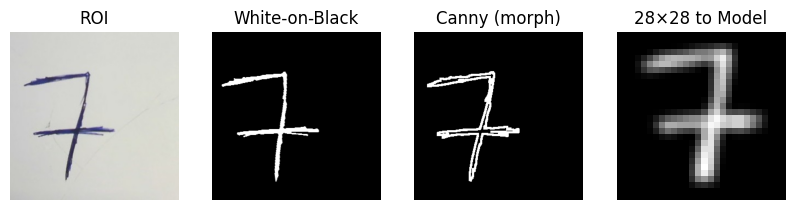

Predicted digit: 7


In [ ]:
# ==== FULL PIPELINE: Webcam → CANNY-ONLY preprocessing → 28×28 MNIST → TFLite ====

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

import numpy as np, cv2, matplotlib.pyplot as plt, tensorflow as tf
from scipy import ndimage

# ----------------------- Config -----------------------
TFLITE_PATH = "/mnist_edge_ds_cnn_int8 .tflite"  # <-- change if needed
BOX_REL = 0.65          # green square as fraction of min(videoW, videoH)
QUALITY = 0.9
DEBUG = True            # False => only show ROI and print prediction

# Canny + morph tuning
CANNY_SIGMA = 0.30      # 0.25–0.40; higher = stricter thresholds
CANNY_APERTURE = 3      # 3 or 5
CANNY_L2 = True
EDGE_ALPHA = 0.40       # how much edges influence the fused mask (0..1)
MORPH_KERNEL = (3,3)    # closing/dilation kernel
EDGE_DILATE_ITERS = 1   # thicken edges a little
THICKEN_ITERS = 1       # extra dilation to mimic MNIST stroke width
HORIZ_KERNEL = (1,4)    # horizontal boost to keep '7'/'4' bars
MNIST_LONG_SIDE = 22    # resize longest side to 22px (MNIST-like), then light blur

# ----------------- Webcam with placement box -----------------
def take_photo_with_box(quality=0.9, box_rel=0.65,
                        full_path='/content/webcam_full.jpg',
                        roi_path='/content/webcam_roi.jpg'):
    js = Javascript(f"""
    async function takePhotoWithBox(quality) {{
      const div = document.createElement('div');
      const video = document.createElement('video');
      const btn   = document.createElement('button');
      const wrap  = document.createElement('div');
      const overlay = document.createElement('div');

      btn.textContent = 'Capture';
      btn.style.fontSize = '16px';
      btn.style.marginTop = '8px';
      wrap.style.position = 'relative';
      wrap.style.display  = 'inline-block';
      video.style.display = 'block';
      video.style.maxWidth = '640px';

      overlay.style.position = 'absolute';
      overlay.style.border = '3px solid #00FF00';
      overlay.style.boxSizing = 'border-box';
      overlay.style.pointerEvents = 'none';

      wrap.appendChild(video);
      wrap.appendChild(overlay);
      div.appendChild(wrap);
      div.appendChild(btn);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      video.srcObject = stream;
      await video.play();

      function positionOverlay() {{
        const vw = video.videoWidth, vh = video.videoHeight;
        if (!vw || !vh) return;
        const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
        const left = Math.floor((vw - s)/2);
        const top  = Math.floor((vh - s)/2);
        const rect = video.getBoundingClientRect();
        const scaleX = rect.width / vw, scaleY = rect.height / vh;
        overlay.style.left   = (left * scaleX) + 'px';
        overlay.style.top    = (top  * scaleY) + 'px';
        overlay.style.width  = (s    * scaleX) + 'px';
        overlay.style.height = (s    * scaleY) + 'px';
      }}

      const ro = new ResizeObserver(positionOverlay);
      ro.observe(video);
      await new Promise(resolve => btn.onclick = resolve);

      const vw = video.videoWidth, vh = video.videoHeight;
      const canvas = document.createElement('canvas');
      canvas.width = vw; canvas.height = vh;
      canvas.getContext('2d').drawImage(video, 0, 0);

      const s = Math.floor(Math.min(vw, vh) * {float(BOX_REL)});
      const left = Math.floor((vw - s)/2);
      const top  = Math.floor((vh - s)/2);

      const crop = document.createElement('canvas');
      crop.width = s; crop.height = s;
      crop.getContext('2d').drawImage(canvas, left, top, s, s, 0, 0, s, s);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return {{
        full: canvas.toDataURL('image/jpeg', quality),
        roi:  crop.toDataURL('image/jpeg', quality)
      }};
    }}
    """)
    display(js)
    data = eval_js("takePhotoWithBox({})".format(quality))

    with open(full_path, 'wb') as f:
        f.write(b64decode(data['full'].split(',')[1]))
    with open(roi_path, 'wb') as f:
        f.write(b64decode(data['roi'].split(',')[1]))
    return full_path, roi_path

# ----------------- CV helpers -----------------
def _largest_component(binary, min_area=50):
    num, labels, stats, _ = cv2.connectedComponentsWithStats((binary>0).astype(np.uint8), 8)
    if num <= 1: return binary
    idx = 1 + int(np.argmax(stats[1:, cv2.CC_STAT_AREA]))
    if stats[idx, cv2.CC_STAT_AREA] < min_area: return binary
    return (labels == idx).astype(np.uint8) * 255

def _deskew(binary):
    m = cv2.moments((binary>0).astype(np.uint8))
    if abs(m['mu02']) < 1e-2: return binary
    skew = m['mu11']/m['mu02']
    h,w = binary.shape
    M = np.float32([[1, skew, -0.5*skew*h],[0,1,0]])
    return cv2.warpAffine(binary, M, (w,h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0)

def _center_by_com(img):
    cy, cx = ndimage.center_of_mass((img>0).astype(np.float32))
    if np.isnan(cy) or np.isnan(cx): return img
    dy, dx = int(round(img.shape[0]/2 - cy)), int(round(img.shape[1]/2 - cx))
    return ndimage.shift(img.astype(np.float32), (dy, dx), order=1,
                         mode='constant', cval=0.0).astype(np.uint8)

def _resize_to_mnist_canvas(binary, long_side=22, post_blur=True):
    canvas = np.zeros((28,28), np.uint8)
    ys, xs = np.where(binary>0)
    if len(xs)==0:
        out = canvas
    else:
        x0,x1,y0,y1 = xs.min(),xs.max(),ys.min(),ys.max()
        crop = binary[y0:y1+1, x0:x1+1]
        h,w = crop.shape
        if h>=w:
            new_h, new_w = long_side, max(1, int(round(long_side*w/h)))
        else:
            new_w, new_h = long_side, max(1, int(round(long_side*h/w)))
        resized = cv2.resize(crop, (new_w,new_h), interpolation=cv2.INTER_AREA)
        y_off, x_off = (28-new_h)//2, (28-new_w)//2
        canvas[y_off:y_off+new_h, x_off:x_off+new_w] = resized
        out = canvas
    if post_blur:
        out = cv2.GaussianBlur(out, (3,3), 0)   # MNIST-like softness
    return (out.astype(np.float32)/255.0)

# ----------------- Preprocess: CANNY-ONLY (enhanced for 1/4/7) -----------------
def preprocess_canny_enhanced(gray):
    dbg = {}
    # 1) normalize lighting
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    g = clahe.apply(gray)
    g = cv2.GaussianBlur(g, (3,3), 0)

    # 2) adaptive threshold + auto invert (white digit on black)
    th = cv2.adaptiveThreshold(g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 31, 5)
    inv = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv
    wob = cv2.medianBlur(wob, 3)
    wob = _largest_component(wob)
    wob = _deskew(wob)

    # 3) Canny with auto hysteresis thresholds
    med = np.median(g)
    lower = int(max(0, (1.0 - CANNY_SIGMA) * med))
    upper = int(min(255, (1.0 + CANNY_SIGMA) * med))
    edges = cv2.Canny(g, lower, upper, apertureSize=CANNY_APERTURE, L2gradient=CANNY_L2)

    # 4) reconnect & thicken edges (closing + dilation + optional extra thickening)
    k = np.ones(MORPH_KERNEL, np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, k, iterations=1)
    if EDGE_DILATE_ITERS > 0:
        edges = cv2.dilate(edges, k, iterations=EDGE_DILATE_ITERS)
    if THICKEN_ITERS > 0:
        edges = cv2.dilate(edges, np.ones((2,2), np.uint8), iterations=THICKEN_ITERS)

    # 5) fuse edges with binarized digit
    fused = cv2.max(wob, (edges * EDGE_ALPHA).astype(np.uint8))

    # 6) horizontal boost to preserve bars (helps 7/4 vs 1)
    h_kernel = np.ones(HORIZ_KERNEL, np.uint8)
    fused = cv2.dilate(fused, h_kernel, iterations=1)

    # 7) clean + center
    fused = cv2.medianBlur(fused, 3)
    fused = _largest_component(fused)
    fused = _center_by_com(fused)

    # 8) resize to MNIST canvas
    mnist28 = _resize_to_mnist_canvas(fused, long_side=MNIST_LONG_SIDE, post_blur=True)

    dbg['wob'] = wob
    dbg['edges'] = edges
    dbg['fused'] = fused
    return mnist28, dbg

# ----------------- TFLite (INT8) -----------------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    x = img28_float[None, ..., None]                     # (1,28,28,1)
    xq = (x/in_scale + in_zero).round().astype(np.int8)  # quantize
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    y  = (yq.astype(np.float32) - out_zero) * out_scale  # dequantize logits
    return int(np.argmax(y))

# ----------------- Capture → Preprocess → Predict -----------------
full_path, roi_path = take_photo_with_box(quality=QUALITY, box_rel=BOX_REL)

bgr  = cv2.imread(roi_path)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

mnist28, dbg = preprocess_canny_enhanced(gray)
pred = tflite_predict(mnist28)

# ----------------- Display -----------------
if DEBUG:
    plt.figure(figsize=(10,3))
    plt.subplot(1,4,1); plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)); plt.title('ROI'); plt.axis('off')
    plt.subplot(1,4,2); plt.imshow(dbg['wob'], cmap='gray'); plt.title('White-on-Black'); plt.axis('off')
    plt.subplot(1,4,3); plt.imshow(dbg['edges'], cmap='gray'); plt.title('Canny (morph)'); plt.axis('off')
    plt.subplot(1,4,4); plt.imshow(mnist28, cmap='gray'); plt.title('28×28 to Model'); plt.axis('off')
    plt.show()
else:
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,4)); plt.imshow(rgb); plt.axis('off'); plt.show()

print(f"Predicted digit: {pred}")

<IPython.core.display.Javascript object>

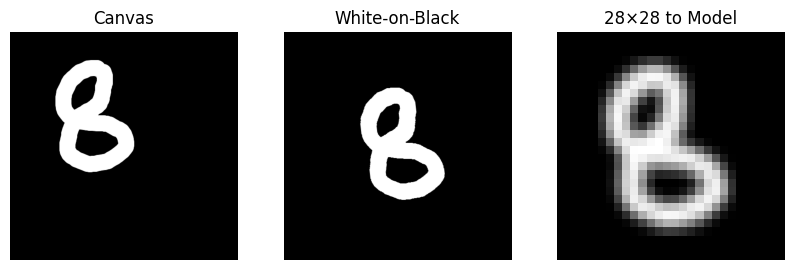

Predicted digit: 8  (confidence: 0.23)


In [ ]:
# ==== FULL PIPELINE: Mouse Pad → 28×28 MNIST → TFLite INT8 ====
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np, cv2, matplotlib.pyplot as plt, tensorflow as tf
from scipy import ndimage

# ----------------------- Config -----------------------
TFLITE_PATH = "/content/mnist_edge_ds_cnn_int8 .tflite"  # <-- set your path
PAD_SIZE    = 512      # draw area in pixels (square)
BRUSH_SIZE  = 18       # default brush radius
DEBUG       = True     # show MNIST 28×28 view

# --------------------- Draw Pad (JS) -------------------
def draw_digit_pad(pad=PAD_SIZE, brush=BRUSH_SIZE):
    js = Javascript(f"""
    async function drawPad(padSize, brushRad) {{
      // --- DOM elements ---
      const wrap = document.createElement('div');
      wrap.style.fontFamily = 'system-ui, sans-serif';
      wrap.style.padding = '8px';
      wrap.style.display = 'inline-block';
      wrap.style.border = '1px solid #ddd';
      wrap.style.borderRadius = '8px';
      wrap.style.userSelect = 'none';

      const canvas = document.createElement('canvas');
      canvas.width = padSize; canvas.height = padSize;
      canvas.style.border = '1px solid #444';
      canvas.style.background = '#000';   // black background
      canvas.style.touchAction = 'none';  // prevent scrolling on touch

      const row = document.createElement('div');
      row.style.marginTop = '8px';
      row.style.display = 'flex';
      row.style.gap = '8px';
      const btnPredict = document.createElement('button');
      const btnUndo    = document.createElement('button');
      const btnClear   = document.createElement('button');
      const btnSave    = document.createElement('button');
      const brushLbl   = document.createElement('span');
      const brushInp   = document.createElement('input');

      btnPredict.textContent = 'Predict';
      btnUndo.textContent    = 'Undo';
      btnClear.textContent   = 'Clear';
      btnSave.textContent    = 'Save PNG';

      for (const b of [btnPredict,btnUndo,btnClear,btnSave]) {{
        b.style.padding = '6px 10px';
        b.style.fontSize = '14px';
        b.style.cursor = 'pointer';
      }}

      brushLbl.textContent = 'Brush';
      brushLbl.style.alignSelf = 'center';
      brushInp.type = 'range';
      brushInp.min = 4; brushInp.max = 48; brushInp.value = brushRad;
      brushInp.style.width = '140px';
      brushInp.oninput = () => {{ r = parseInt(brushInp.value); }};

      row.appendChild(btnPredict);
      row.appendChild(btnUndo);
      row.appendChild(btnClear);
      row.appendChild(btnSave);
      row.appendChild(brushLbl);
      row.appendChild(brushInp);

      wrap.appendChild(canvas);
      wrap.appendChild(row);
      document.body.appendChild(wrap);

      const ctx = canvas.getContext('2d');
      let r = brushRad;
      ctx.fillStyle = "#000"; ctx.fillRect(0,0,canvas.width, canvas.height);

      // draw state
      let drawing = false, last = null;
      const strokes = []; // for undo: store image snapshots

      function snapshot() {{
        strokes.push(ctx.getImageData(0,0,canvas.width, canvas.height));
        if (strokes.length > 30) strokes.shift();
      }}

      function drawDot(x,y) {{
        ctx.beginPath();
        ctx.arc(x,y,r,0,2*Math.PI);
        ctx.fillStyle = '#fff';
        ctx.fill();
      }}
      function drawLine(x0,y0,x1,y1) {{
        ctx.strokeStyle = '#fff';
        ctx.lineCap = 'round';
        ctx.lineJoin = 'round';
        ctx.lineWidth = r*2;
        ctx.beginPath();
        ctx.moveTo(x0,y0);
        ctx.lineTo(x1,y1);
        ctx.stroke();
      }}

      // Mouse
      canvas.onmousedown = e => {{
        drawing = true; last = [e.offsetX, e.offsetY];
        snapshot(); drawDot(e.offsetX, e.offsetY);
      }};
      canvas.onmousemove = e => {{
        if (!drawing) return;
        const [x0,y0] = last; const x1=e.offsetX, y1=e.offsetY;
        drawLine(x0,y0,x1,y1); last=[x1,y1];
      }};
      window.onmouseup = () => drawing=false;

      // Touch
      canvas.addEventListener('touchstart', e => {{
        e.preventDefault();
        const rect = canvas.getBoundingClientRect();
        const t = e.touches[0];
        const x = (t.clientX-rect.left)*canvas.width/rect.width;
        const y = (t.clientY-rect.top )*canvas.height/rect.height;
        drawing = true; last = [x,y]; snapshot(); drawDot(x,y);
      }}, {{"passive": false}});
      canvas.addEventListener('touchmove', e => {{
        e.preventDefault();
        if (!drawing) return;
        const rect = canvas.getBoundingClientRect();
        const t = e.touches[0];
        const x = (t.clientX-rect.left)*canvas.width/rect.width;
        const y = (t.clientY-rect.top )*canvas.height/rect.height;
        const [x0,y0] = last; drawLine(x0,y0,x,y); last=[x,y];
      }}, {{"passive": false}});
      window.addEventListener('touchend', ()=> drawing=false);

      btnClear.onclick = () => {{
        ctx.fillStyle="#000"; ctx.fillRect(0,0,canvas.width, canvas.height);
      }};
      btnUndo.onclick = () => {{
        if (strokes.length===0) return;
        const im = strokes.pop(); ctx.putImageData(im,0,0);
      }};
      btnSave.onclick = () => {{
        const a = document.createElement('a');
        a.href = canvas.toDataURL('image/png'); a.download = 'digit.png'; a.click();
      }};

      // Resolve on Predict
      const result = await new Promise(resolve => {{
        btnPredict.onclick = () => {{
          resolve({{ img: canvas.toDataURL('image/png') }});
        }};
      }});

      // remove UI
      wrap.remove();
      return result;
    }}
    """)
    display(js)
    data = eval_js(f"drawPad({pad}, {brush})")
    return data['img']

# ----------------- Helpers: MNIST conversion -----------------
def _deskew(binary):
    m = cv2.moments((binary>0).astype(np.uint8))
    if abs(m['mu02']) < 1e-3: return binary
    skew = m['mu11']/m['mu02']
    h,w = binary.shape
    M = np.float32([[1, skew, -0.5*skew*h],[0,1,0]])
    return cv2.warpAffine(binary, M, (w,h), flags=cv2.INTER_LINEAR,
                          borderMode=cv2.BORDER_CONSTANT, borderValue=0)

def _center_by_com(img):
    cy, cx = ndimage.center_of_mass((img>0).astype(np.float32))
    if np.isnan(cy) or np.isnan(cx): return img
    dy, dx = int(round(img.shape[0]/2 - cy)), int(round(img.shape[1]/2 - cx))
    return ndimage.shift(img.astype(np.float32), (dy, dx), order=1,
                         mode='constant', cval=0.0).astype(np.uint8)

def to_mnist_from_pad(rgb_png_bytes):
    # decode PNG -> BGR -> GRAY
    img_array = np.frombuffer(rgb_png_bytes, dtype=np.uint8)
    bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)  # white strokes on black bg already

    # binarize (just in case anti-aliased edges exist)
    _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # ensure white-on-black
    inv = 255 - th
    wob = th if np.count_nonzero(th) < np.count_nonzero(inv) else inv

    # connect thin gaps, deskew, center by COM
    wob = cv2.morphologyEx(wob, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), 1)
    wob = _deskew(wob)
    wob = _center_by_com(wob)

    # place on 28×28: longest side 20, then pad, then small blur
    ys, xs = np.where(wob>0)
    canvas28 = np.zeros((28,28), np.uint8)
    if len(xs) > 0:
        x0,x1,y0,y1 = xs.min(),xs.max(),ys.min(),ys.max()
        crop = wob[y0:y1+1, x0:x1+1]
        h,w = crop.shape
        if h>=w:
            nh, nw = 20, max(1, int(round(20*w/h)))
        else:
            nw, nh = 20, max(1, int(round(20*h/w)))
        small = cv2.resize(crop,(nw,nh), interpolation=cv2.INTER_AREA)
        y_off, x_off = (28-nh)//2, (28-nw)//2
        canvas28[y_off:y_off+nh, x_off:x_off+nw] = small
    mnist = cv2.GaussianBlur(canvas28, (3,3), 0).astype(np.float32)/255.0
    return mnist, bgr, wob, canvas28

# ----------------- TFLite (INT8) -----------------
interpreter = tf.lite.Interpreter(model_path=TFLITE_PATH)
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]
out = interpreter.get_output_details()[0]
in_scale, in_zero = inp["quantization"]
out_scale, out_zero = out["quantization"]

def tflite_predict(img28_float):
    x = img28_float[None, ..., None]                     # (1,28,28,1)
    xq = (x/in_scale + in_zero).round().astype(np.int8)  # quantize
    interpreter.set_tensor(inp["index"], xq)
    interpreter.invoke()
    yq = interpreter.get_tensor(out["index"])[0]
    y  = (yq.astype(np.float32) - out_zero) * out_scale  # dequantize logits
    probs = tf.nn.softmax(y).numpy()
    pred = int(np.argmax(probs))
    conf = float(probs[pred])
    return pred, conf

# ----------------- Capture from pad → Preprocess → Predict -----------------
data_url = draw_digit_pad(pad=PAD_SIZE, brush=BRUSH_SIZE)
png_bytes = b64decode(data_url.split(',')[1])

mnist28, bgr, wob, canvas28 = to_mnist_from_pad(png_bytes)
pred, conf = tflite_predict(mnist28)

# ----------------- Display -----------------
plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)); plt.title('Canvas'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(wob, cmap='gray'); plt.title('White-on-Black'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(mnist28, cmap='gray'); plt.title('28×28 to Model'); plt.axis('off')
plt.show()

print(f"Predicted digit: {pred}  (confidence: {conf:.2f})")
